In [73]:
import pickle
import pandas as pd
import dtale
import datetime
import matplotlib.pyplot as plt
import tabloo
import numpy as np

plt.style.use('ggplot')

In [2]:
%matplotlib widget

In [ ]:
def bondPriceToYield(bondRow):
    timeLeft = bondRow['maturity'] - bondRow['date']
    interestRate = bondRow['coupon']
    yearsLeft = timeLeft.days/365.
    interest = yearsLeft * interestRate
    totalYield = (100 - bondRow['end-of-day-price'] + interest)/yearsLeft
    return totalYield

In [148]:
treasuriesPicklePath = '/Users/jetti/data/bonds/treasuries.pkl'

with open(treasuriesPicklePath, 'rb') as f:
  data = pickle.load(f)

df = pd.DataFrame(data)
df.columns = ['date','cusip','description','coupon','maturity','call','buy','sell','end-of-day-price']
df = df.drop(['call','buy','sell'], axis=1)
df['end-of-day-price'] = df['end-of-day-price'].astype('float')
df['coupon'] = [float(i[0:-1]) for i in df['coupon']]
df['maturity'] = [datetime.datetime.strptime(i,'%m/%d/%Y') for i in df['maturity']]

print(len(df))

1168117


2023-10-09 07:31:49,048 - INFO     - Executing shutdown due to inactivity...
2023-10-09 07:32:13,170 - INFO     - Executing shutdown...
2023-10-09 07:32:13,173 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [128]:
# create dictionary mapping cusip to term length for COMPLETED cusips
termDict = {}

earliestDate = df['date'].min()
latestDate = df['date'].max()

for thisCusip in set(df['cusip']):
    dfCusip = df[df['cusip'] == thisCusip]
    minDate = dfCusip['date'].min()
    maxDate = dfCusip['date'].max()
    if minDate > earliestDate and maxDate < latestDate:
        maturity = dfCusip['maturity'].iloc[0]
        termLength = ((maturity - minDate).days)/7
        termDict[thisCusip] = (termLength, maturity)
    else:
        termDict[thisCusip] = (0,0)

In [180]:
# find cusips with given termlength bounds

lower = 24
upper = 27

cusips = [(cusip, termLength, maturity) for cusip, (termLength, maturity) in termDict.items() if termLength >= lower and termLength <= upper]
cusips

[('912796RU5', 26.0, Timestamp('2019-06-13 00:00:00')),
 ('912796RH4', 26.0, Timestamp('2019-04-18 00:00:00')),
 ('9127957F2', 26.0, Timestamp('2013-02-14 00:00:00')),
 ('912796LY3', 26.0, Timestamp('2017-10-19 00:00:00')),
 ('9127957M7', 26.0, Timestamp('2013-03-21 00:00:00')),
 ('912796JC4', 26.0, Timestamp('2016-07-28 00:00:00')),
 ('9127956S5', 26.0, Timestamp('2012-11-08 00:00:00')),
 ('9127956G1', 26.0, Timestamp('2012-09-06 00:00:00')),
 ('912796PG8', 26.0, Timestamp('2018-05-17 00:00:00')),
 ('912796GM5', 26.0, Timestamp('2015-11-05 00:00:00')),
 ('912796Z51', 26.0, Timestamp('2023-08-31 00:00:00')),
 ('912796RS0', 26.0, Timestamp('2019-06-06 00:00:00')),
 ('912796DJ5', 26.0, Timestamp('2014-07-17 00:00:00')),
 ('912796XT1', 26.0, Timestamp('2023-02-02 00:00:00')),
 ('9127955Y3', 26.0, Timestamp('2012-08-02 00:00:00')),
 ('912796HL6', 26.0, Timestamp('2016-04-14 00:00:00')),
 ('912796AF6', 26.0, Timestamp('2013-05-09 00:00:00')),
 ('9127956H9', 26.0, Timestamp('2012-09-13 00:00

In [ ]:
# find cusips with given maturity date

year = 2023
month = 9
day = 12

cusipList = list(set(df[df['maturity'] == datetime.datetime(year=year, month=month, day=day)]['cusip']))
cusipList

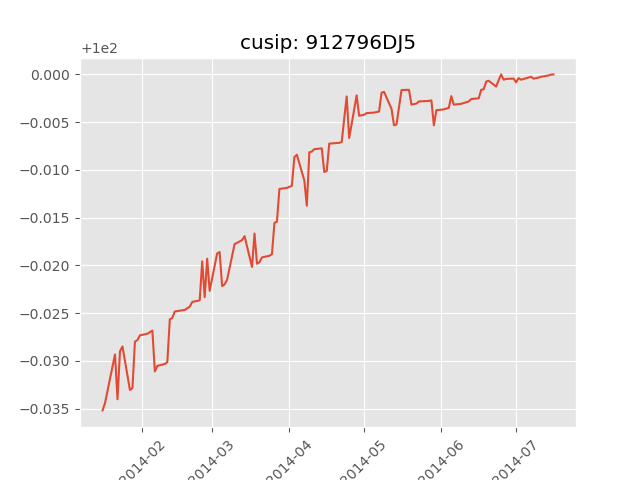

In [186]:
# find data for given CUSIP

cusip = '912796DJ5'

thisTreasury = df[df['cusip'] == cusip].sort_values('date')

plt.figure()
plt.plot(thisTreasury['date'],thisTreasury['end-of-day-price'].to_numpy())
plt.xticks(rotation=45)
plt.title("cusip: " + cusip)
plt.show()

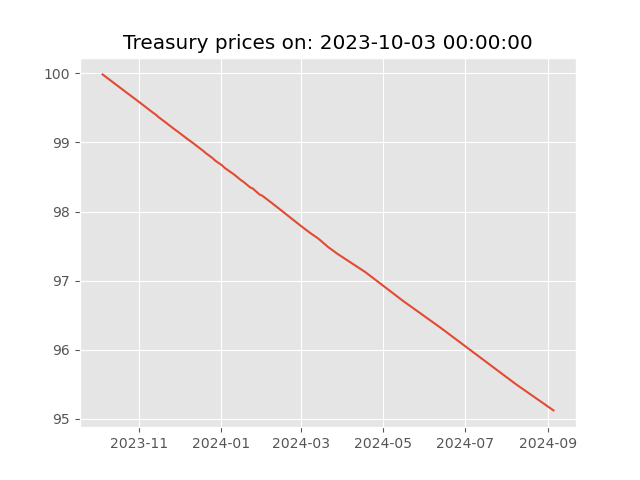

In [197]:
year = 2023
month = 10
day = 3

thisDate = datetime.datetime(year=year, month=month, day=day)
#thisDayAll = df[(df['date'] == thisDate) & (df['description'] != 'TIPS') &  (df['description'] != 'MARKET BASED FRN')].sort_values('maturity')
#thisDayAll = df[(df['date'] == thisDate) & (df['description'] == 'MARKET BASED BILL')].sort_values('maturity')
thisDayAll = df[(df['date'] == thisDate) & (df['coupon'] == 0)].sort_values('maturity')

plt.figure()
plt.plot(thisDayAll['maturity'],thisDayAll['end-of-day-price'].to_numpy())
plt.title("Treasury prices on: " + str(thisDate))
plt.show()

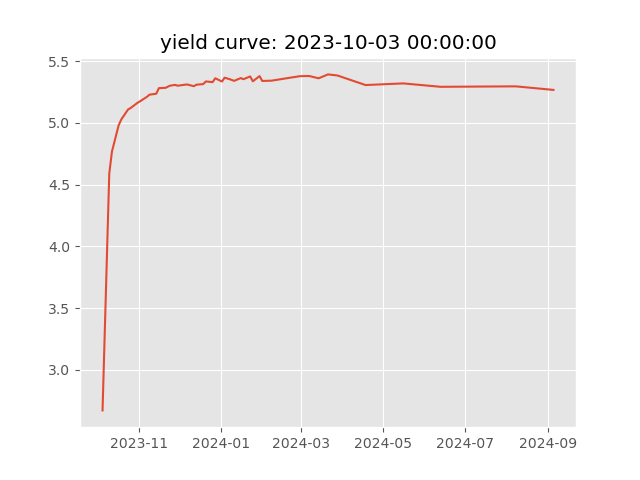

In [199]:
allYields = [bondPriceToYield(thisDayAll.iloc[i]) for i in range(0,len(thisDayAll))]
thisDayAll['yield'] = allYields
plt.figure()
plt.plot(thisDayAll['maturity'],allYields)
plt.title("yield curve: " + str(thisDate))
plt.show()

In [ ]:
2